# CAR4U SUPERVISER LEARNING PROJECT

## Data Dictionary

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Load and explore the data

In [2]:
df = pd.read_csv("car4u.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Drop Serial Number
Its irrevelant to the Data structure for further analysis

In [3]:
df=df.drop(['S.No.'],axis=1)

In [4]:
df2 = pd.read_csv("car4u.csv", index_col=0)

## Check column types and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

## Count of variables on each columns

In [7]:
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

## Spliting of units from Power, Engine, New_Price, Mileage

In [8]:
dff2=df['Power'].str.split(" ", n = 1, expand = True)
df["Power"]=dff2[0]
df['bhp']=dff2[1]
df.drop(columns=['bhp'], inplace = True)

In [9]:
dff3=df['Engine'].str.split(" ", n = 1, expand = True)
df["Engine"]=dff3[0]
df['CC']=dff3[1]
df.drop(columns=['CC'], inplace = True)

In [10]:
dff4=df['New_Price'].str.split(" ", n = 1, expand = True)
df['New_Price']=dff4[0]
df['Lakh']=dff4[1]
df.drop(columns=['Lakh'], inplace = True)

In [11]:
dff4=df['Mileage'].str.split(" ", n = 1, expand = True)
df['Mileage']=dff4[0]
df['kmpl']=dff4[1]
df.drop(columns=['kmpl'], inplace = True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN,NaN


## Changing Object variables to Floats 

In [12]:
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
df['New_Price'] = pd.to_numeric(df['New_Price'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Power'].dtypes

dtype('float64')

## Spliting of the Mileage Unit from numeric value

In [13]:
Mileage_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if df[colname].str.endswith(('km/kg'), ('kmpl')).any():  # using `.str` so I can use an element-wise string method
        Mileage_cols.append(colname)
print(Mileage_cols)

[]


## Split Name column to Brand Name and Brand Model

In [14]:
dff5 = df["Name"].str.split(" ", n = 1, expand = True)
df["Brand_Name"]= dff5[0] 
df["Model_Name"]= dff5[1]
df.drop(columns= ["Name"], inplace = True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name,Model_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,Volkswagen,Vento Diesel Trendline
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,Volkswagen,Polo GT TSI
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,Nissan,Micra Diesel XV
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,Volkswagen,Polo GT TSI


In [15]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [16]:
df = movecol(df, 
             cols_to_move=['Brand_Name','Model_Name'], 
             ref_col='Location',
             place='Before')
df

,Brand_Name,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen,Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan,Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen,Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


## Fill in missing values with the Median

In [17]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [18]:
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    7253
dtype: int64

## Observation
No missing Values in the variables 

## Finding out the data types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Name         7253 non-null   object 
 1   Model_Name         7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7253 non-null   float64
 9   Engine             7253 non-null   float64
 10  Power              7253 non-null   float64
 11  Seats              7253 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              7253 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 793.4+ KB


## Data Description

In [20]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7253.0,18.141586,4.561567,0.00,15.17,18.16,21.10,33.54
Engine,7253.0,1615.789742,593.475257,72.00,1198.00,1493.00,1968.00,5998.00
Power,7253.0,112.312448,52.922581,34.20,77.00,94.00,138.03,616.00
Seats,7253.0,5.277678,0.809039,0.00,5.00,5.00,5.00,10.00
New_Price,7253.0,12.466204,7.955703,1.00,11.27,11.27,11.27,99.92
Price,7253.0,8.826235,10.293313,0.44,3.85,5.64,8.40,160.00


## Observation
1. Most cars were sold in 2019
2. New Price has a constant inter-Quatile of 11.27Lakh because of over 5000 missing values 
3. The only price variale that the Mean and Standard deviation are close.

In [21]:
df.median()

Year                  2014.00
Kilometers_Driven    53416.00
Mileage                 18.16
Engine                1493.00
Power                   94.00
Seats                    5.00
New_Price               11.27
Price                    5.64
dtype: float64

## Non Numeric Variale Count

In [22]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
        

In [23]:
num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Name: Brand_Name, dtype: int64
Only displaying first 10 of 33 values.



XUV500 W8 2WD          55
Swift VDI              49
Swift Dzire VDI        42
City 1.5 S MT          39
Swift VDI BSIV         37
Ritz VDi               35
Fortuner 3.0 Diesel    35
Amaze S i-Dtech        32
City 1.5 V MT          32
Grand i10 Sportz       32
Name: Model_Name, dtype: int64
Only displaying first 10 of 2041 values.



Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Man

## Observation
1. Maruti and Hyndia Car has the highest number of cars bought
2. Brand Model is almost evenly distributed
3. Mumbai & Hyderabad the top 2 locations where cars are bought
4. Diesel & Petrol cars are the 2 mostly purchased cars only 2 Eletric cars were purchased

# Univariance and Multi-Variance Analysis

## Explore the dependent variable Price

In [24]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(feature.mean(), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color='black', linestyle='-') # Add median to the histogram

In [25]:
df.head()

,Brand_Name,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,11.27,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.27,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.27,17.74


## New_Price Exploratory Data Analysis

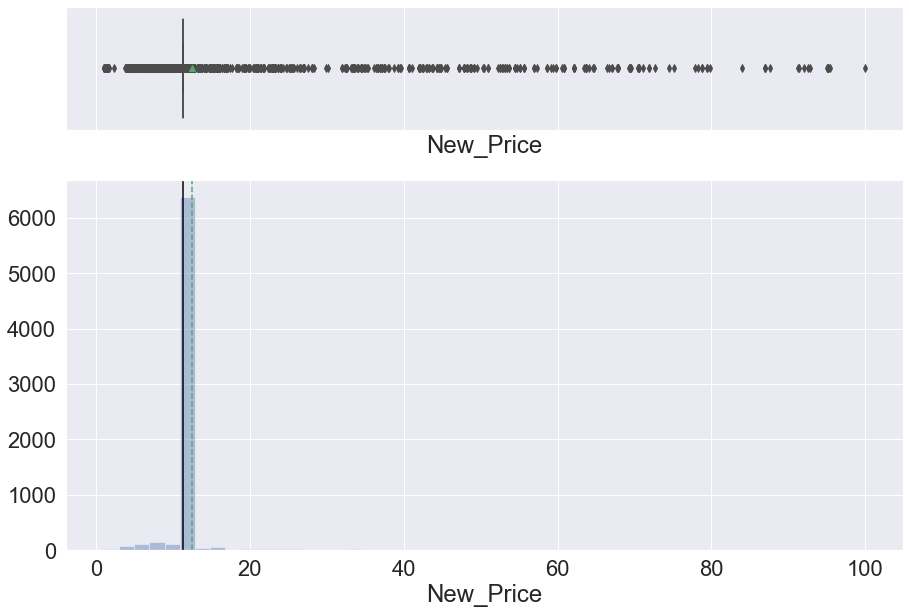

In [26]:
histogram_boxplot(df.New_Price)

### Observation
1. The median and mean amount to 11.27Lakh and 12.4Lakh because of the median filler for over 5000 missing values.

## Price Exploratory Data Analysis

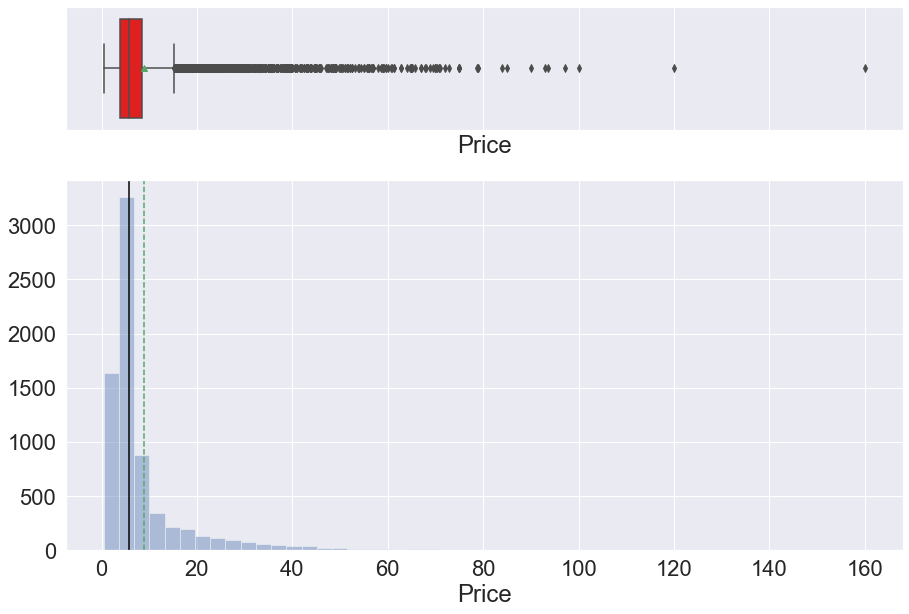

In [27]:
histogram_boxplot(df.Price)

### Observation
1. The median is 5.64Lakh and a mean of 8.8Lakh
2. There are a lot of extreme values 

## Outliers in every numerical column

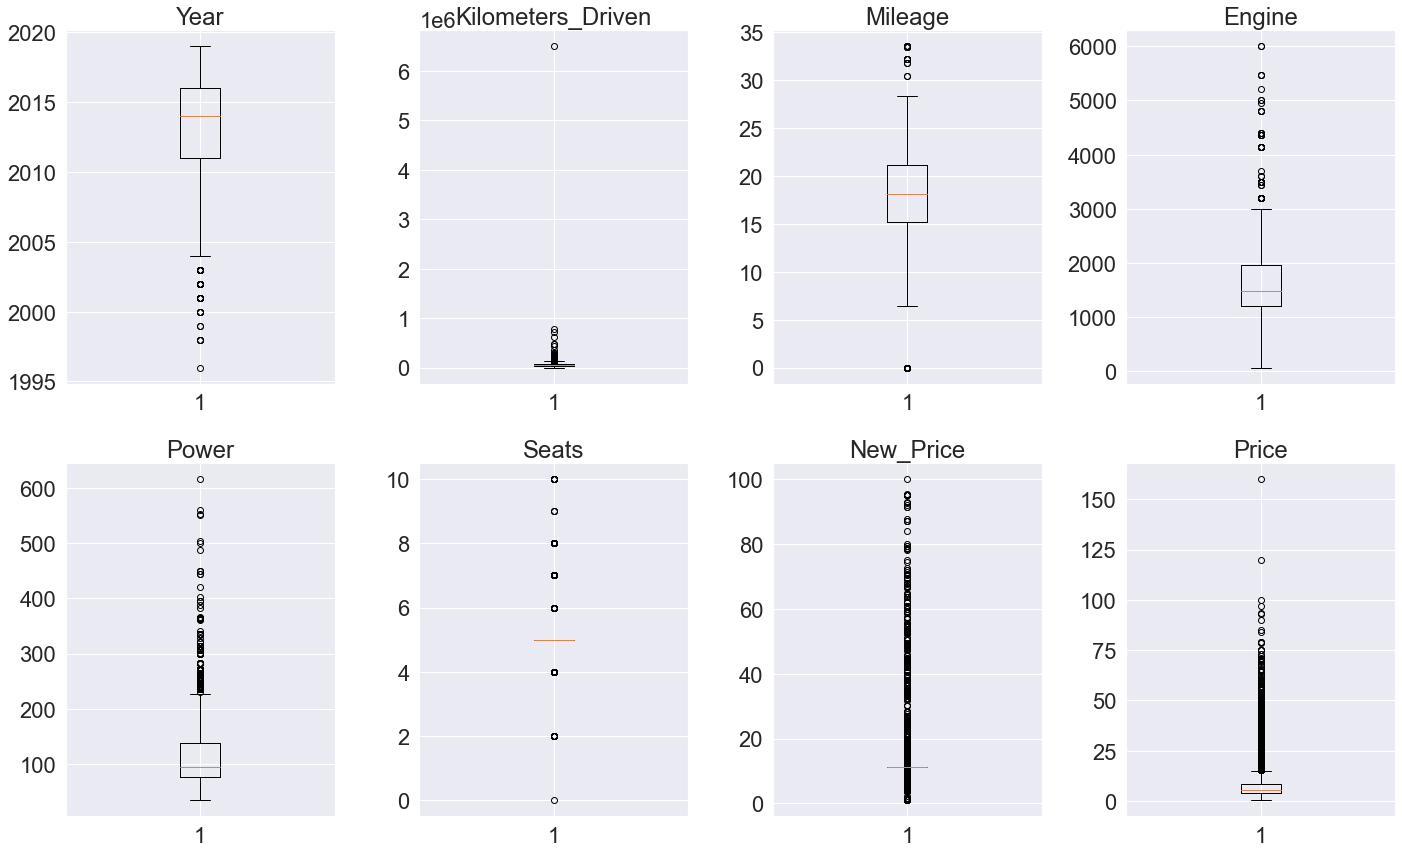

In [28]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Observation
1. Year has a lowe outlier
2. power, price and new price have the highest number of outliers
3. Mileage, and seats have both upper and lower outliers 

## Distribution of each numerical variable.

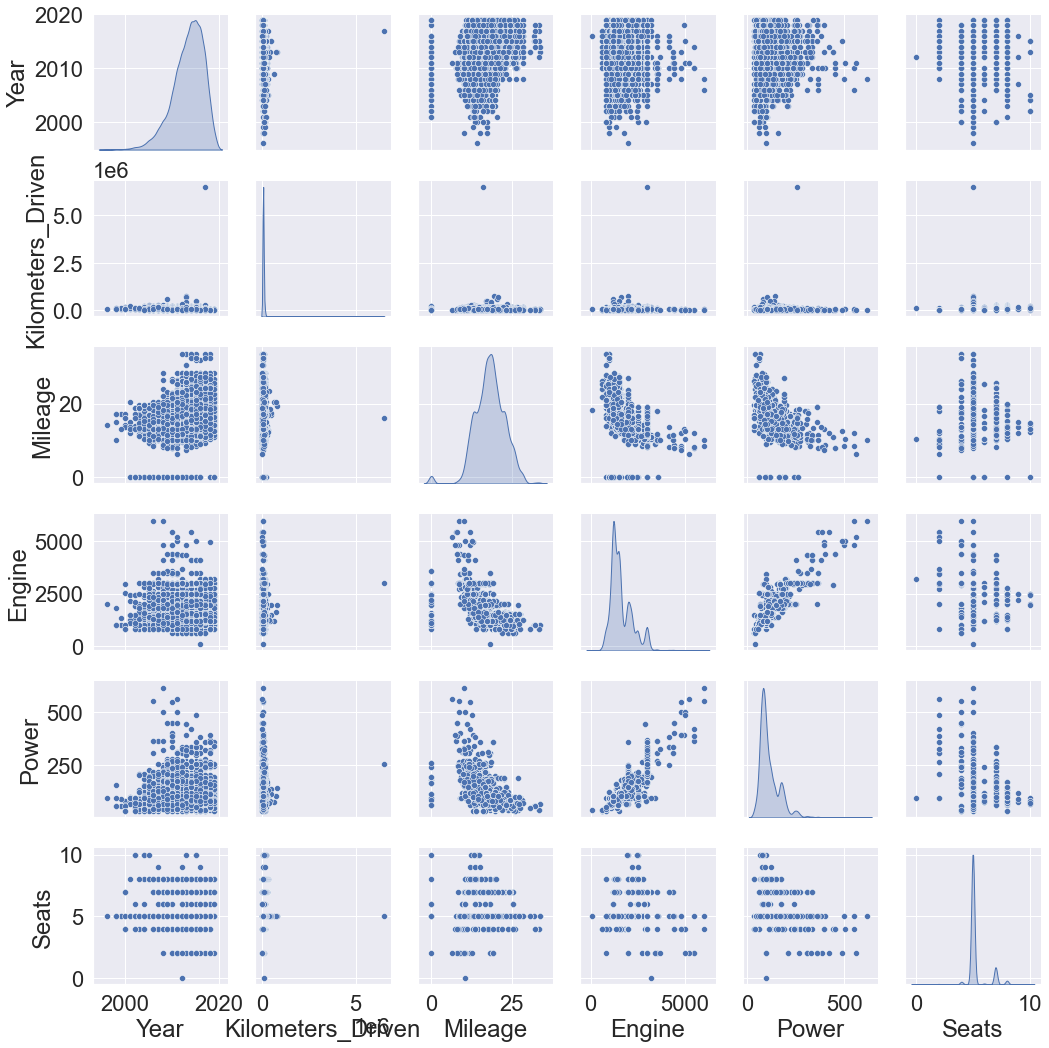

In [29]:
df_attr = df.iloc[:, 2:12]
sns.pairplot(df_attr, diag_kind='kde')

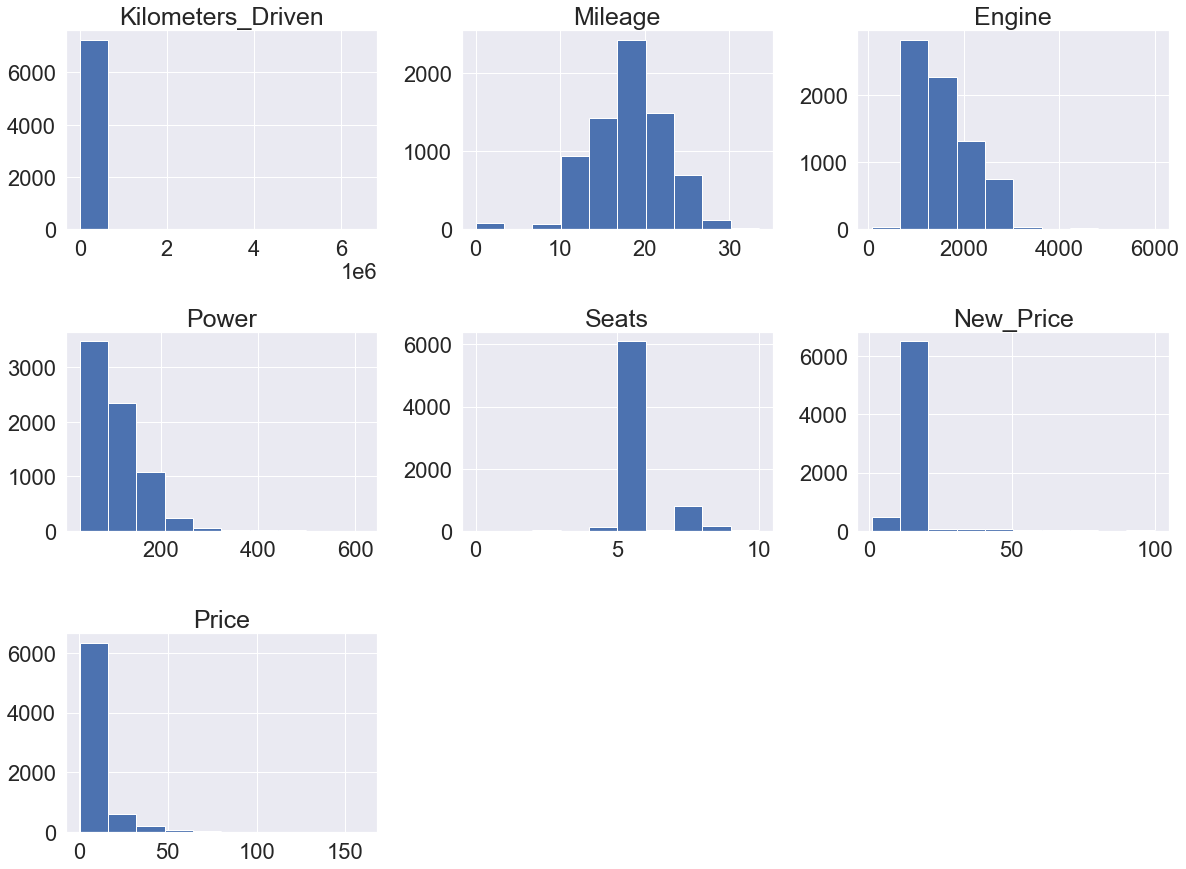

In [30]:
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Year')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.histplot(df[all_col[i]], kde=True)   #you can comment the previous line and run this one to get distribution curves too
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

### Observation
1. Mileage is more normally distributed and Seats is somewhat normally distributed.
2. Engine, power, Engine and Price are rightly skewed.
    . Power and Engine distribution starts decreasing from the         minimum up to the maximum
    . New price is skewed to the left

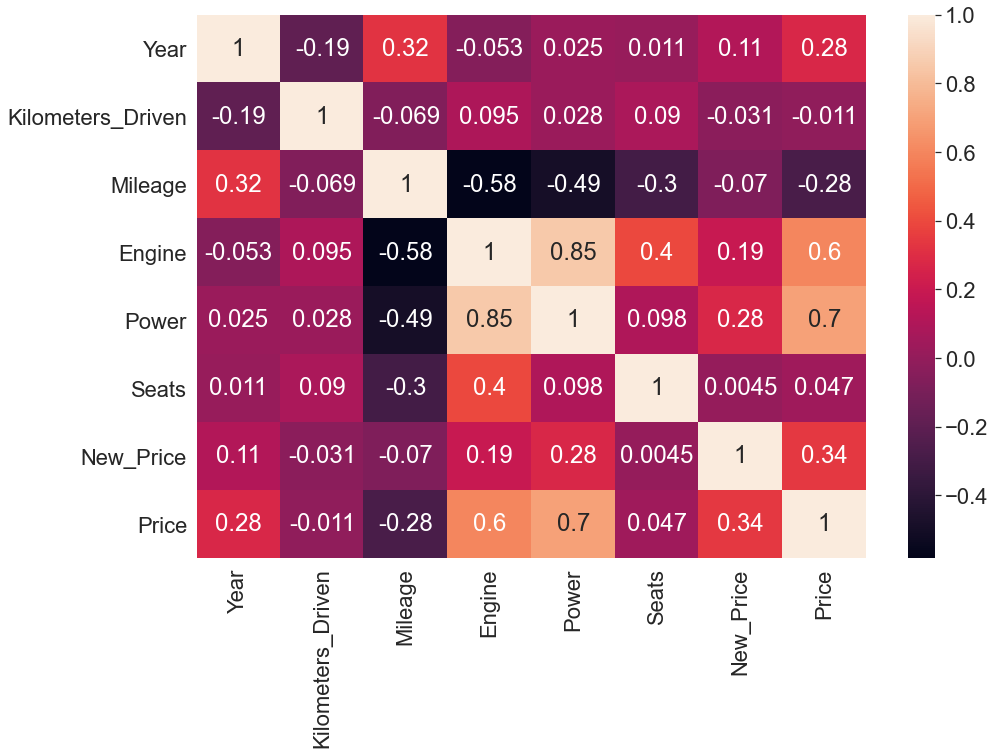

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Observation
1. price has a strong positive correlation with Power, Engine which means that the as the power and engine increases so this the price of the cars.
2. The highest correlation is Engine and power. 
3. Mileage to Engine and power have a negative correlation as the mileage and power are low so those the engine usage

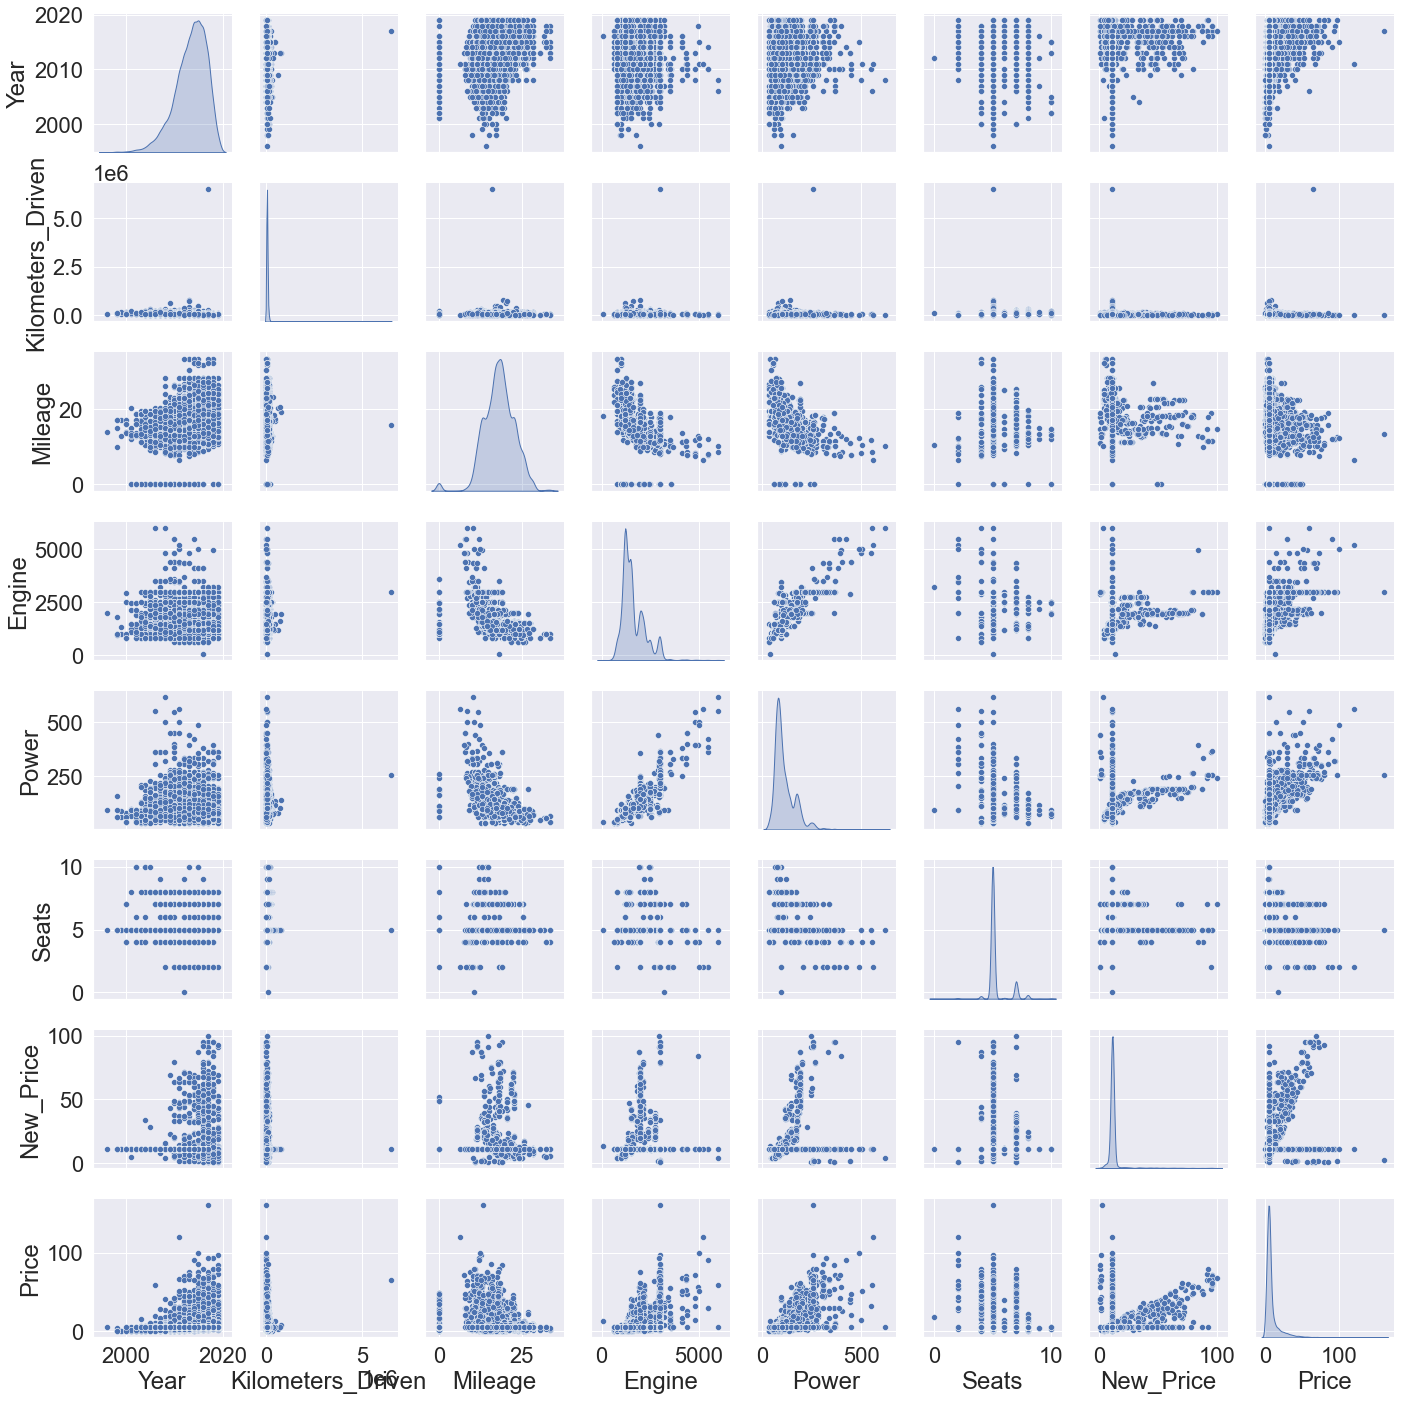

In [32]:
df_attr = df.iloc[:, 2:14]
sns.pairplot(df_attr, diag_kind='kde') 

In [33]:
df.head()

,Brand_Name,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,11.27,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.27,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.27,17.74


## Price vs Mileage

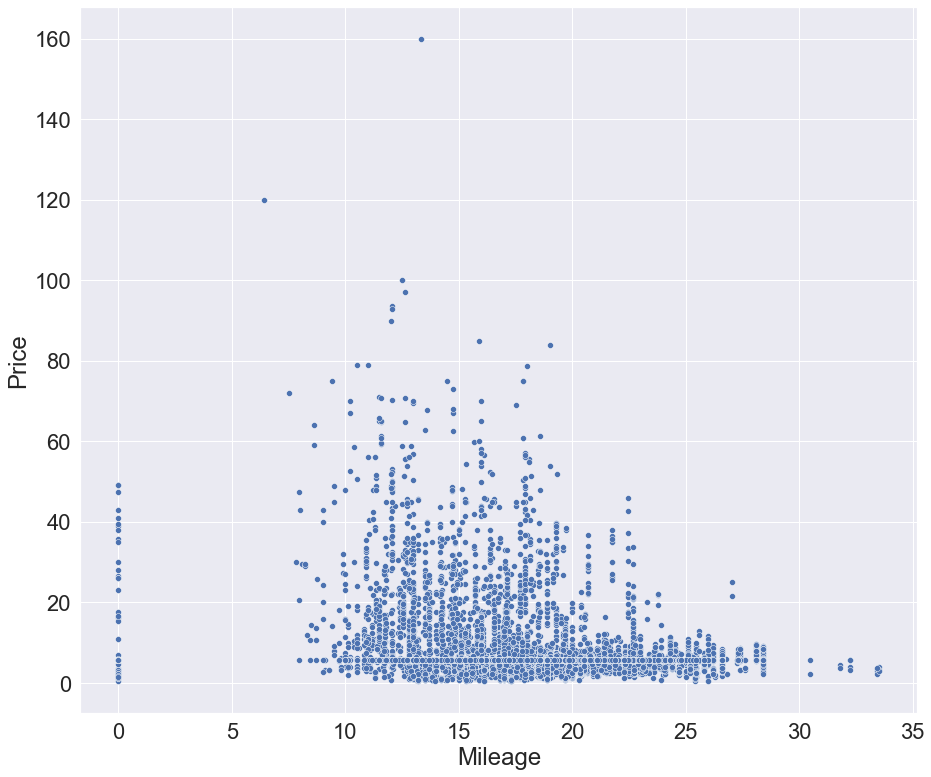

In [34]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Mileage', data=df);

### Observation
1. Used cars bought have a mileage of between 10-25 and the prices are concentrated between 1.4Lakhs and 20Lakhs

## Price vs Fuel_Type

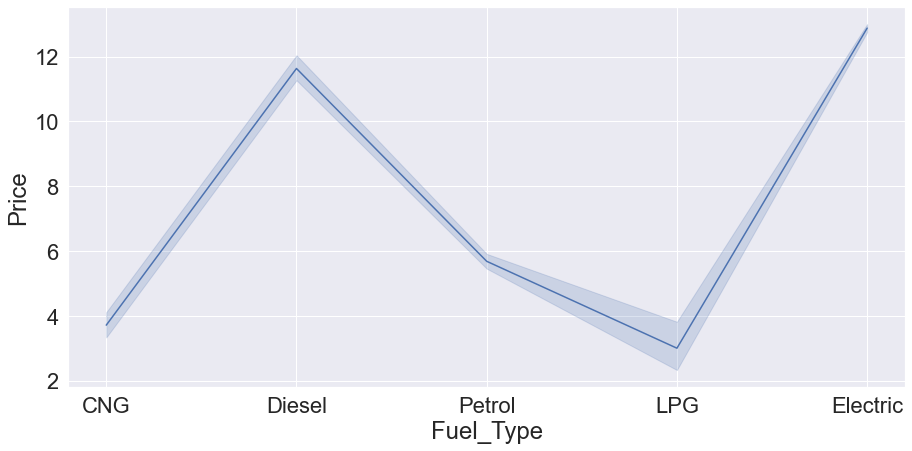

In [35]:
plt.figure(figsize=(15,7))
sns.lineplot(y='Price', x='Fuel_Type', data=df);

### Observation
1. LPG Cars sell at the lowest
2. Electric and Diesel cars sells at the highest price
3. Petrol sales at a medium price

## Price vs Location

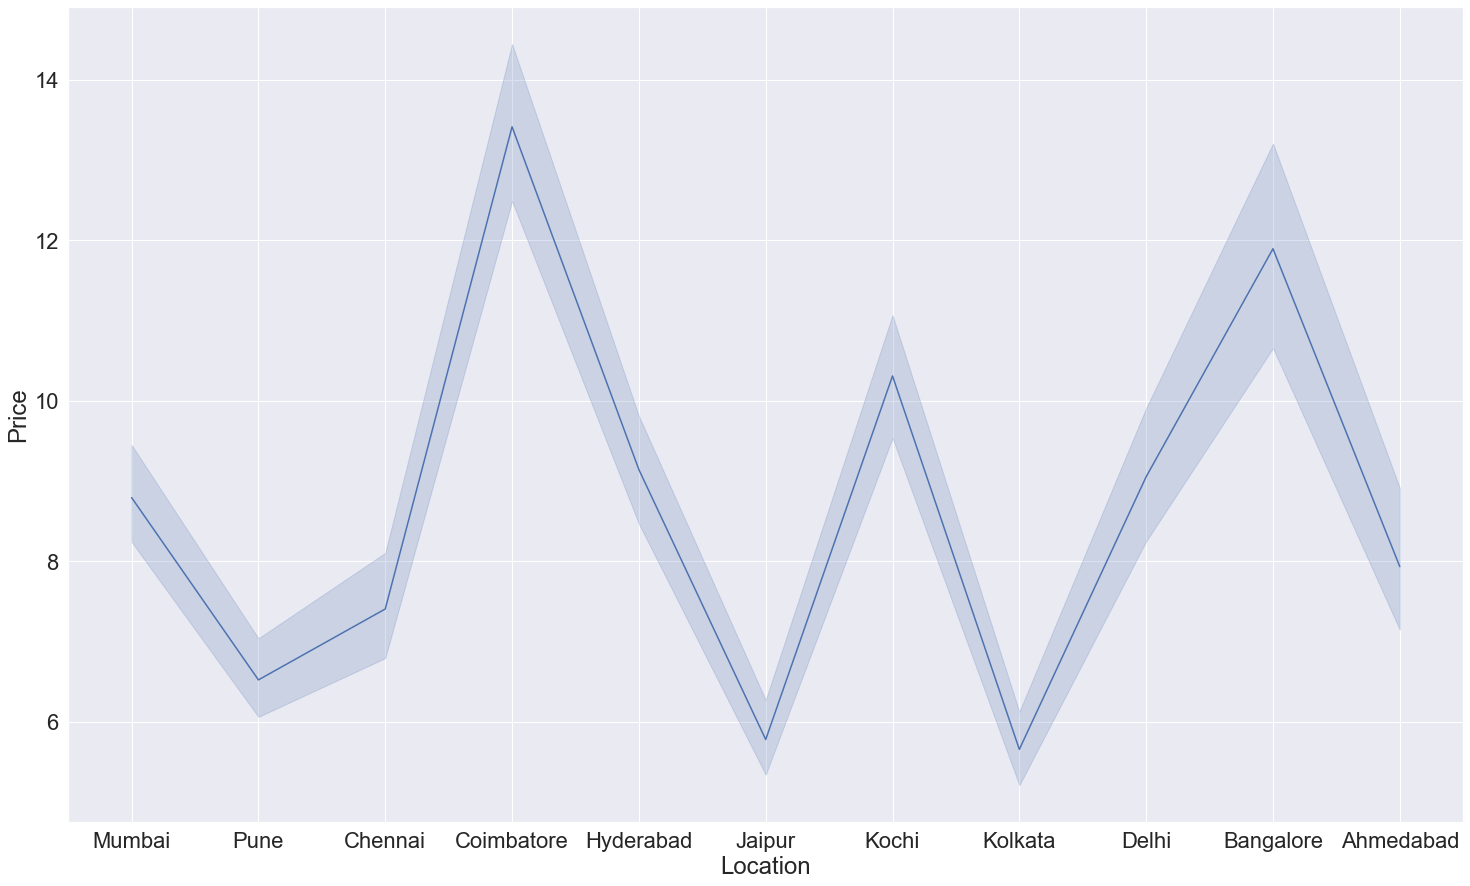

In [36]:
plt.figure(figsize=(25,15))
sns.lineplot(y='Price', x='Location', data=df);

## Observation
1. Coimbatore sold the highest price of used cars 
2. Jaipur and Kolkata sold the lowest price of used cars

## Price VS Location VS Owner_Type

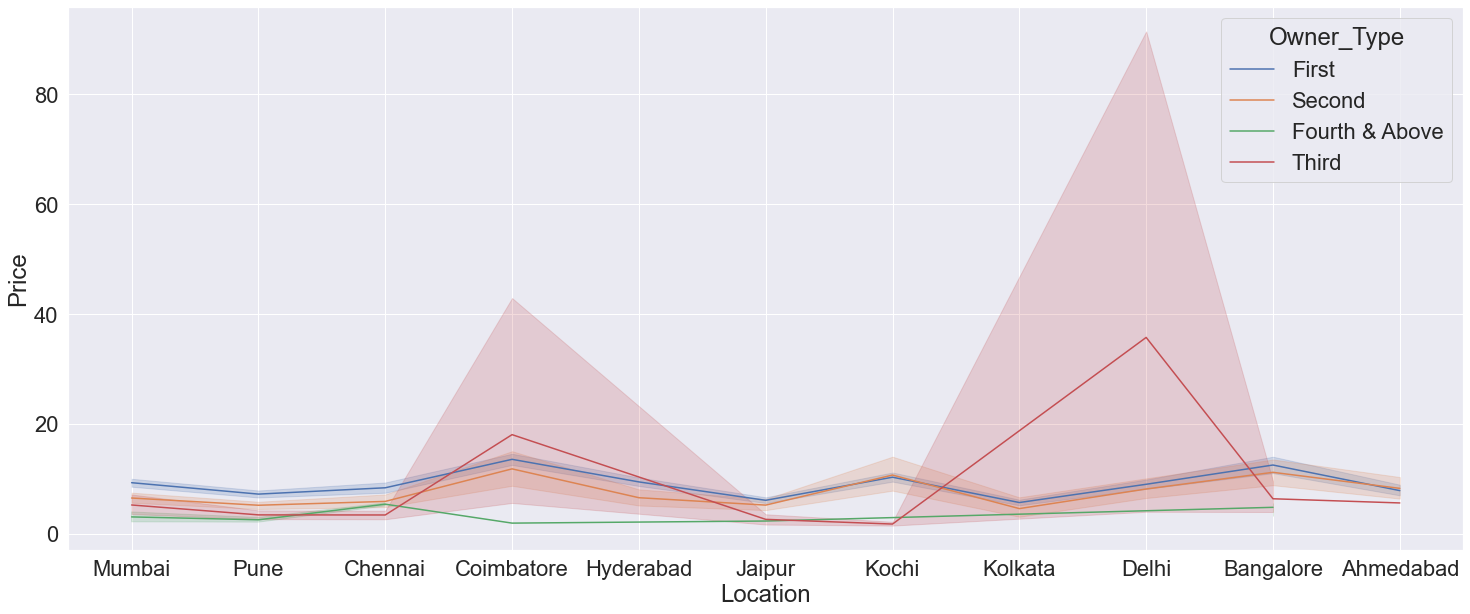

In [37]:
plt.figure(figsize=(25,10))
sns.lineplot(y='Price', x='Location',hue='Owner_Type', data=df);

### Observation
1. 3 owner cars sell at a higher price in Coimbatore, Kolkata and Delhi
2. All other owner type are almost consistent around other location. 

## Price VS Brand_Name VS Location

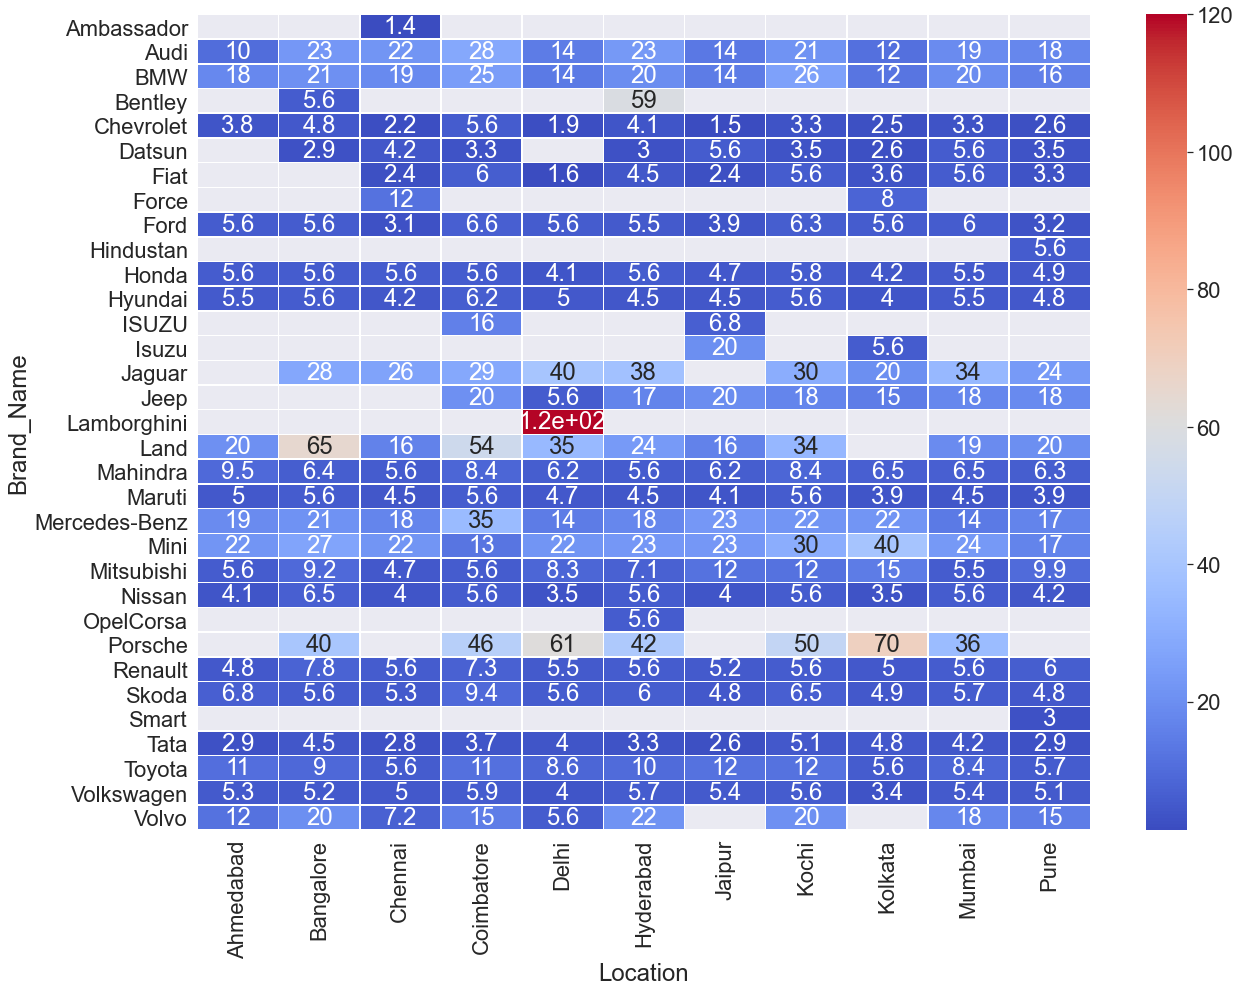

In [38]:
df_hm =df.pivot_table(index = 'Brand_Name',columns ='Location',values ="Price",aggfunc=np.median)
# Draw a heatmap 
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_hm,   cmap='coolwarm',linewidths=.5, annot=True, ax=ax);

## Observation
1. Lamborghini was bought at the highest price in Dehli
2. The high earned cars are bough in India's Big cities like Delhi, Kolkata, Bangalore, Hyderabada.

## Price VS Year

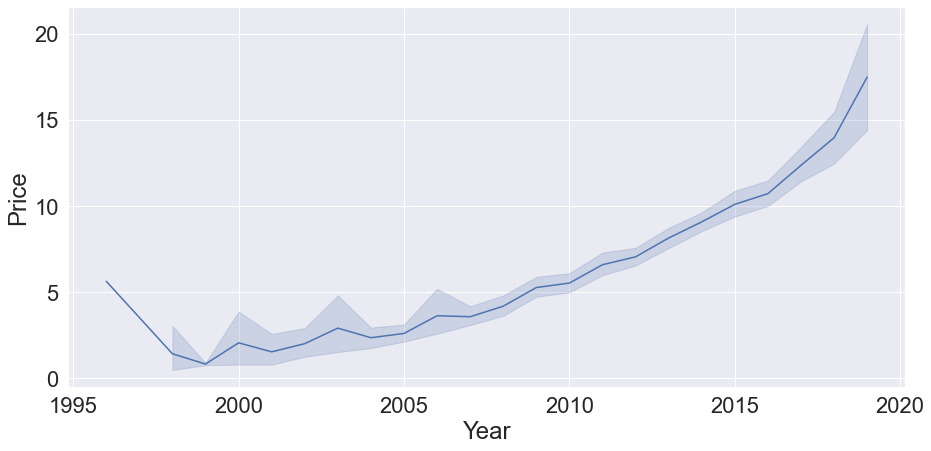

In [39]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',
             data=df);


## Observation
1. the price of used cars started increase over the years from 1999. 

## Price VS Kilometers_Driven

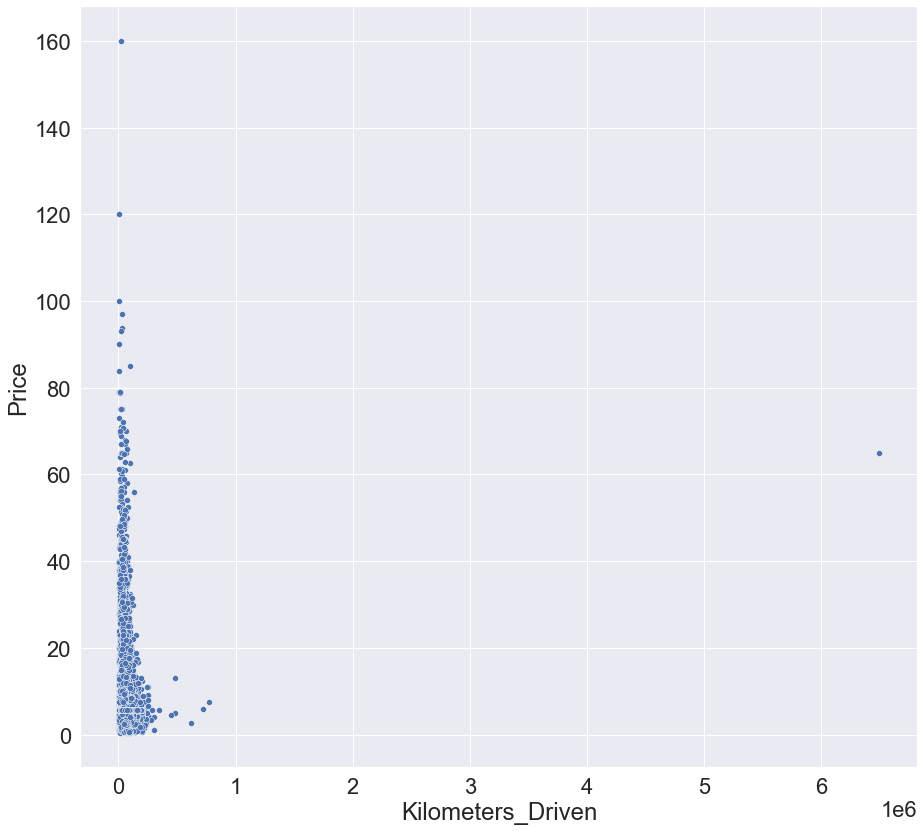

In [40]:
plt.figure(figsize=(15,14))
sns.scatterplot(x='Kilometers_Driven', y='Price',
             data=df);

## Observation
1. Kilometer driven doesnt really affect the price of used cars.

## Price VS Transmission

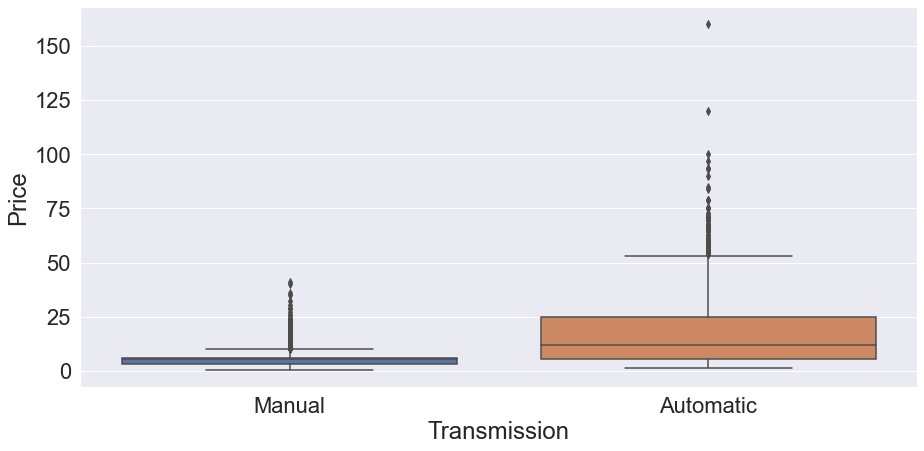

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Transmission', y='Price',
             data=df); 



## Observation
1. Automatic used car sell at a higher price and Volume.
2. Manual cars sell at most 50Lahk

## Price VS Transmission VS Owner_Type

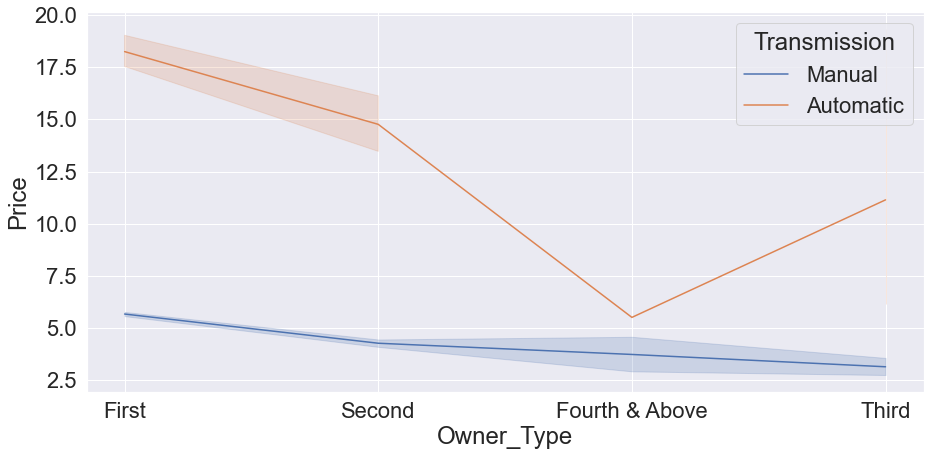

In [42]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Owner_Type', y='Price',hue='Transmission',
             data=df);

## Observation
1. Automatic cars sell higher tha Manual cars regardless of the Owner_Type
2. As the number of owners increases so those the cost of the Used cars

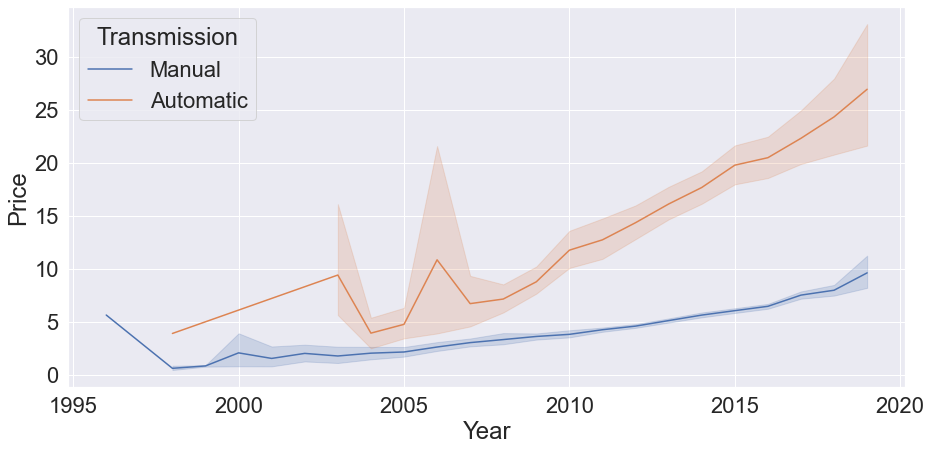

In [43]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=df);

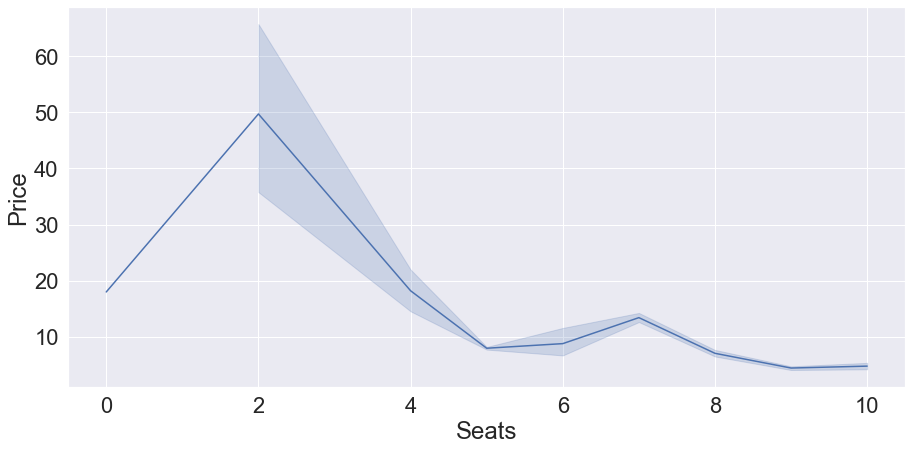

In [48]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Seats', y='Price',
             data=df);

## Price VS Power

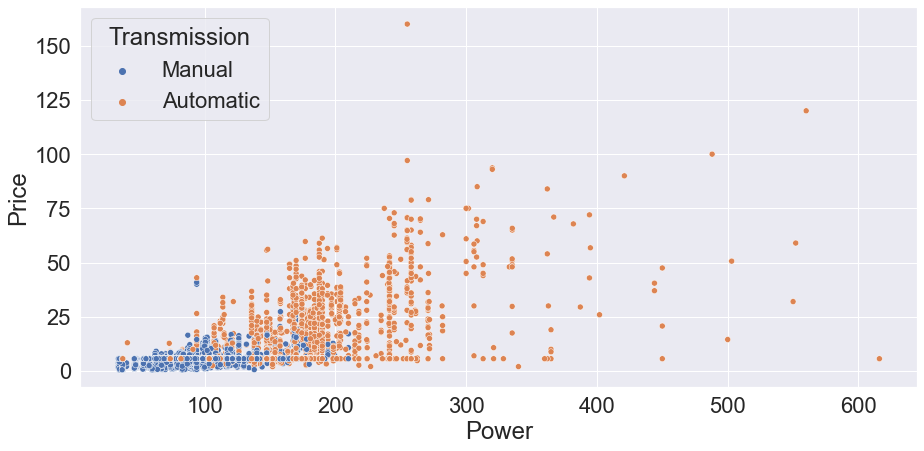

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Power', y='Price',hue='Transmission',
             data=df);

### Observation
1. Used Cars with higher power and are automatic sell at a higher price
2. Used Cars with lower power sell at the lowest prices

## Price VS Brand_Name VS Seats

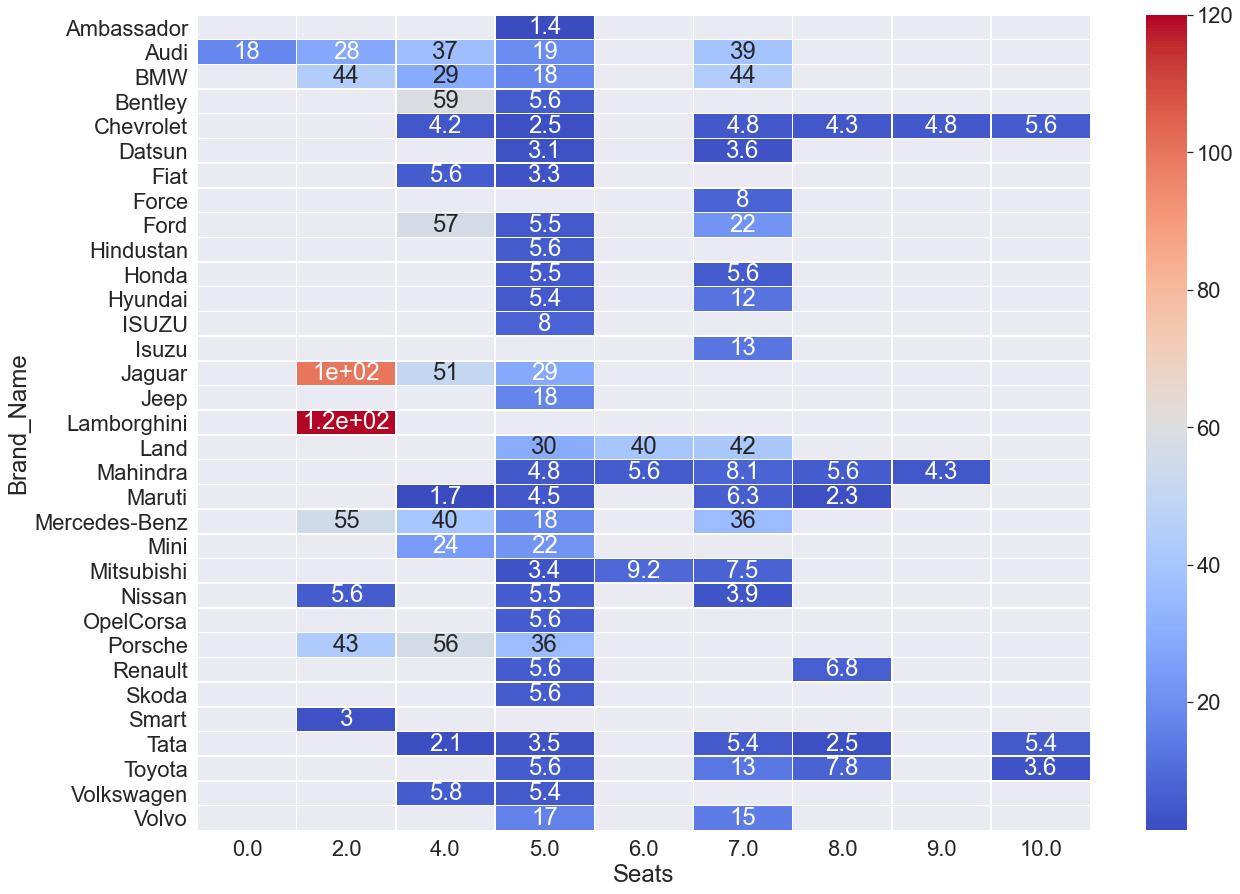

In [49]:
df_hm =df.pivot_table(index = 'Brand_Name',columns ='Seats',values ="Price",aggfunc=np.median)
# Draw a heatmap 
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_hm,   cmap='coolwarm',linewidths=.5, annot=True, ax=ax);

### Observation
1. 5 seaters Used cars have the highest number of sales across all car brand expect three
2. 2 seaters Used Jaguar and Lamborghini cars sold at the highest price

## Change All Object to Categorical Variable

In [50]:
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Brand_Name'] = df['Brand_Name'].astype('category')
df['Location'] = df['Location'].astype('category')


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brand_Name         7253 non-null   category
 1   Model_Name         7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7253 non-null   float64 
 9   Engine             7253 non-null   float64 
 10  Power              7253 non-null   float64 
 11  Seats              7253 non-null   float64 
 12  New_Price          7253 non-null   float64 
 13  Price              7253 non-null   float64 
dtypes: category(5), float64(6), int64(2), object(1)
memory usage: 547.9+ KB


## Outliers Treatment

In [52]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

## Treating the outiers

In [53]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

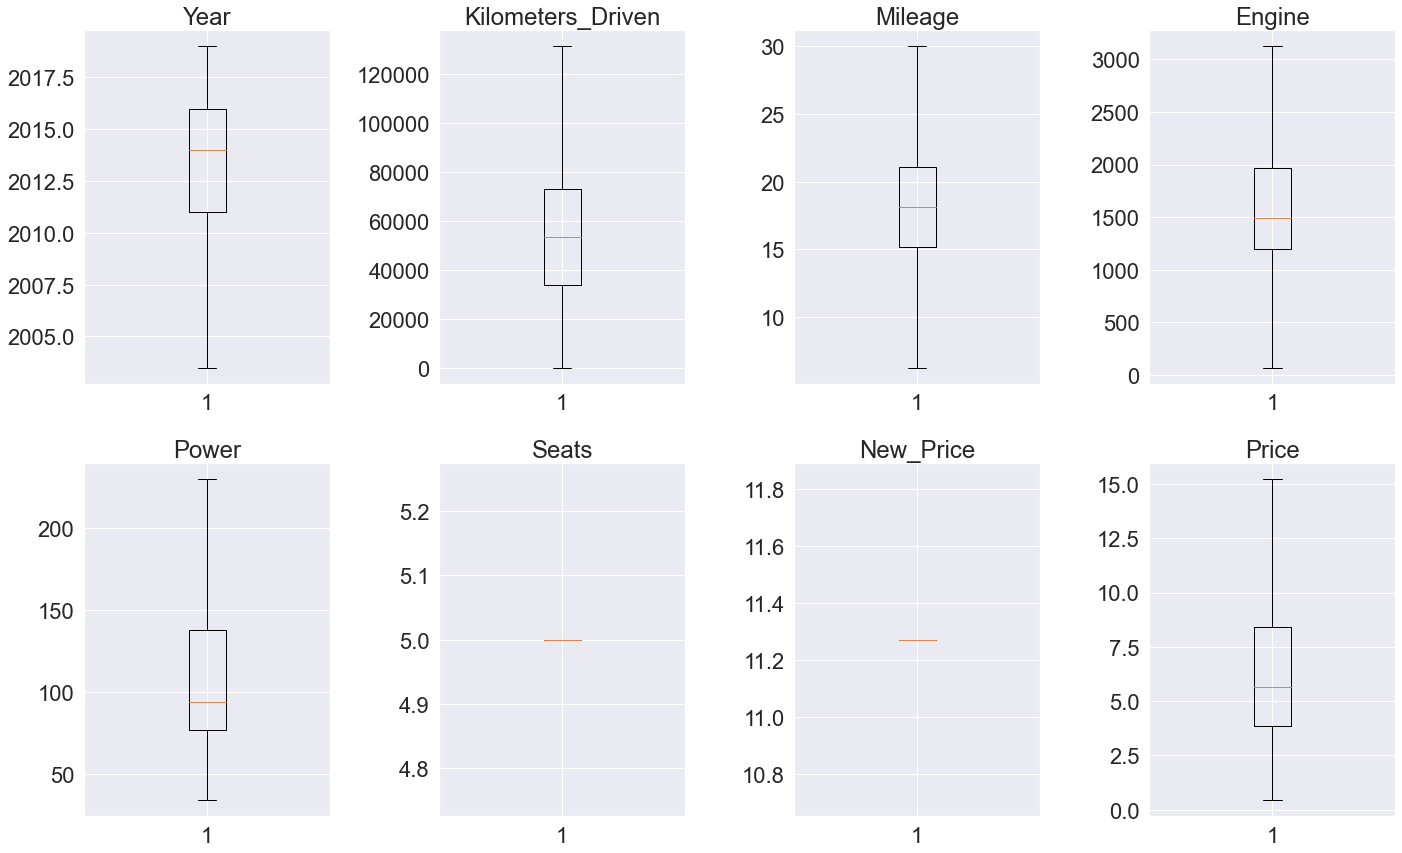

In [54]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()


## Model Building

In [55]:
df.drop(['Model_Name','Seats'],axis=1,inplace=True)
df

,Brand_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price,Price
0,Maruti,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,11.27,1.750
1,Hyundai,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,11.27,12.500
2,Honda,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,11.27,4.500
3,Maruti,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,11.27,6.000
4,Audi,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,11.27,15.225
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Hyderabad,2011.0,89411,Diesel,Manual,First,20.54,1598.0,103.60,11.27,5.640
7249,Volkswagen,Mumbai,2015.0,59000,Petrol,Automatic,First,17.21,1197.0,103.60,11.27,5.640
7250,Nissan,Kolkata,2012.0,28000,Diesel,Manual,First,23.08,1461.0,63.10,11.27,5.640
7251,Volkswagen,Pune,2013.0,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,11.27,5.640


In [56]:
X = df.drop(['Price', 'New_Price'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())

  Brand_Name    Location    Year  Kilometers_Driven Fuel_Type Transmission  \
0     Maruti      Mumbai  2010.0              72000       CNG       Manual   
1    Hyundai        Pune  2015.0              41000    Diesel       Manual   
2      Honda     Chennai  2011.0              46000    Petrol       Manual   
3     Maruti     Chennai  2012.0              87000    Diesel       Manual   
4       Audi  Coimbatore  2013.0              40670    Diesel    Automatic   

  Owner_Type  Mileage  Engine   Power  
0      First    26.60   998.0   58.16  
1      First    19.67  1582.0  126.20  
2      First    18.20  1199.0   88.70  
3      First    20.77  1248.0   88.76  
4     Second    15.20  1968.0  140.80  
    Price
0   1.750
1  12.500
2   4.500
3   6.000
4  15.225


## Create Dummy Variables

In [57]:
X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission', 'Owner_Type','Location','Brand_Name'],drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Hindustan,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_ISUZU,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo
0,2010.0,72000,26.60,998.0,58.16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000,19.67,1582.0,126.20,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000,18.20,1199.0,88.70,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000,20.77,1248.0,88.76,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670,15.20,1968.0,140.80,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [59]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Hindustan,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_ISUZU,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo
2766,2017.0,14061,21.90,1396.0,88.76,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4116,2016.0,28851,16.47,1198.0,73.90,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2222,2010.0,65000,16.47,1198.0,73.90,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5576,2014.0,9200,17.01,1591.0,121.30,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5632,2018.0,3000,23.59,1364.0,67.04,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Choose Model, Train and Evaluate

In [60]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)  

Intercept of the linear equation: [-858.23279025]

COefficients of the equation are: [[ 4.28997210e-01 -7.31837708e-06 -9.74000102e-02  8.29440024e-04
   2.38784209e-02  1.28542289e+00  7.46624659e+00  2.35290916e-01
   3.11548596e-02 -8.24296284e-01  7.55883522e-01 -1.53032413e-01
  -4.17763904e-01  1.69300800e-01  4.34266480e-02  2.45465132e-01
  -3.60787950e-01  3.33415517e-01  1.59974408e-02 -9.72734169e-02
  -8.98400877e-01 -1.71684441e-01 -6.24139356e-02  1.87582608e+00
   1.86666497e+00  5.95031425e-01 -1.81153206e+00 -2.33900105e+00
  -1.90840111e+00 -4.98135453e-01 -1.18683577e+00  2.08093030e+00
  -1.06063550e+00 -8.62391221e-01 -3.41346553e+00  1.80913563e+00
   1.38980790e+00  1.95460176e+00  3.77475828e-15  2.65064149e+00
  -1.08456019e+00 -7.85474281e-01  1.56332455e+00  3.61204443e+00
  -6.28392719e-01 -1.53039620e+00  2.84174859e+00  1.67544133e+00
  -1.28570354e+00 -7.48613546e-01 -2.80589991e+00 -2.20110303e+00
   8.76444230e-01 -1.38148909e+00  7.40387508e-01]]


In [61]:
mean_absolute_error(y_test, pred)

1.521177544593465

In [62]:
mean_squared_error(y_test, pred)**0.5

2.1455355308185324

In [63]:
r2_score(y_test, pred)

0.7390210170365754

In [64]:
linearregression.score(X_train, y_train)  # 70 % data 

0.7257082711860916

In [65]:
linearregression.score(X_test, y_test) # unseen data

0.7390210170365754

## Add-on: statsmodels

In [66]:
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:12   Log-Likelihood:                -11208.
No. Observations:                5077   AIC:                         2.252e+04
Df Residuals:                    5024   BIC:                         2.287e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Observation
- R-squared and Adjusted R-square are 0.72 making the model a good fit as it is close to 1.
- 70% of the variables are below 0.05% significance level which shows that these variable are significant to the dependent variable Price of used cars.
- Negative values of coefficient shows that, Used car prices deceases with their increase for example Fuel type petrol has a negative coeffient of -0.899. When a car consumes lesser fuel it increase the price of used cars that use petrol.
- Positive values of coefficient shows that, Used car prices increases with their increase, Power has a positive coefficient of 0.0267. A as the Power of the car Increases so those the price of Price of Used Cars.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 



## Checking for Multicollinearity using VIF scores

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        862723.702539
Year                              2.173224
Kilometers_Driven                 1.934445
Mileage                           3.463331
Engine                            8.689268
Power                             8.027863
Fuel_Type_Diesel                 31.131701
Fuel_Type_Electric                1.045000
Fuel_Type_LPG                     1.211294
Fuel_Type_Petrol                 31.651868
Transmission_Manual               2.315892
Owner_Type_Fourth & Above         1.015982
Owner_Type_Second                 1.180596
Owner_Type_Third                  1.118728
Location_Bangalore                2.482425
Location_Chennai                  2.965405
Location_Coimbatore               3.502126
Location_Delhi                    3.115255
Location_Hyderabad                3.734941
Location_Jaipur                   2.677237
Location_Kochi                    3.499377
Location_Kolkata                  3.133740
Location_Mumbai    

## Observation
1. I will be dropping Brand_Name_Maruti has the highest variance_inflation_factor (VIF) amoung the other Brand_Name variables.

In [68]:
X_train2 = X_train1.drop('Brand_Name_Maruti', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                        858573.885107
Year                              2.193014
Kilometers_Driven                 1.913551
Mileage                           3.526392
Engine                            8.624019
Power                             7.891877
Fuel_Type_Diesel                 30.173038
Fuel_Type_Electric                1.063085
Fuel_Type_LPG                     1.268143
Fuel_Type_Petrol                 30.771923
Transmission_Manual               2.341044
Owner_Type_Fourth & Above         1.019562
Owner_Type_Second                 1.191316
Owner_Type_Third                  1.125164
Location_Bangalore                2.484085
Location_Chennai                  2.983207
Location_Coimbatore               3.568114
Location_Delhi                    3.143686
Location_Hyderabad                3.653778
Location_Jaipur                   2.688712
Location_Kochi                    3.561383
Location_Kolkata                  3.095819
Location_Mumbai    

## Observation
1. That seemed to have helped - vif has come down to quite a good limit, now we can say features are not correlated

In [69]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:17   Log-Likelihood:                -11208.
No. Observations:                5077   AIC:                         2.252e+04
Df Residuals:                    5024   BIC:                         2.287e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Observation
1. There is no change in the Ajusted R-square value which was same as 0.724 in the previous ols regression model

In [70]:
X_train3 = X_train2.drop('Fuel_Type_Petrol', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                        858253.101475
Year                              2.192947
Kilometers_Driven                 1.908227
Mileage                           3.401512
Engine                            8.514714
Power                             7.878199
Fuel_Type_Diesel                  2.578970
Fuel_Type_Electric                1.015425
Fuel_Type_LPG                     1.013661
Transmission_Manual               2.340627
Owner_Type_Fourth & Above         1.019547
Owner_Type_Second                 1.191316
Owner_Type_Third                  1.125071
Location_Bangalore                2.483940
Location_Chennai                  2.981706
Location_Coimbatore               3.565281
Location_Delhi                    3.143686
Location_Hyderabad                3.651767
Location_Jaipur                   2.685523
Location_Kochi                    3.561241
Location_Kolkata                  3.093518
Location_Mumbai                   3.931893
Location_Pune      

## Observation
1.Dropping of Fuel_Type_Petrol has made the VIF score look better

In [71]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     258.0
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:19   Log-Likelihood:                -11208.
No. Observations:                5077   AIC:                         2.252e+04
Df Residuals:                    5025   BIC:                         2.286e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Observation
 1. The model hasnt changed as the dropping of Fuel_Type_Petrol did not affect the R-Square.

In [72]:
X_train8 = X_train3.drop('Engine', axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train8.values,i) for i in range(X_train8.shape[1])],index=X_train8.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

const                        858245.002092
Year                              2.192922
Kilometers_Driven                 1.904068
Mileage                           2.831982
Power                             4.605778
Fuel_Type_Diesel                  2.086733
Fuel_Type_Electric                1.013603
Fuel_Type_LPG                     1.013585
Transmission_Manual               2.339874
Owner_Type_Fourth & Above         1.019011
Owner_Type_Second                 1.191276
Owner_Type_Third                  1.125057
Location_Bangalore                2.483900
Location_Chennai                  2.981409
Location_Coimbatore               3.564863
Location_Delhi                    3.143668
Location_Hyderabad                3.650519
Location_Jaipur                   2.685505
Location_Kochi                    3.560715
Location_Kolkata                  3.093487
Location_Mumbai                   3.930888
Location_Pune                     3.389331
Brand_Name_Audi    

## Observation
1. Non of the VIF variable values are more than 5 so its a good fit

In [73]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     261.9
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:20   Log-Likelihood:                -11217.
No. Observations:                5077   AIC:                         2.254e+04
Df Residuals:                    5026   BIC:                         2.287e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### We can see Adjusted-R squared for  OLSmod7 is : 0.724 as well as OLSmod 1 is : 0.724, i.e. when we drop Brand_Name_Maruti, Fuel_Type_Petrol and Engine we get the same result, so we will proceed with OLSmod7

## Observation
1. Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance
2. A few variables that are greater the a PV of 0.05 will be dropped to as they are not significant to the model to determine if the Adjusted R-Square improves

## Let's drop the variable 'Fuel_Type_LPG', since it has highest p value among all with p value greater than 0.05

In [74]:
X_train4 = X_train3.drop(['Fuel_Type_LPG'], axis=1)

In [75]:
olsmod3 = sm.OLS(y_train, X_train3)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     258.0
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:20   Log-Likelihood:                -11208.
No. Observations:                5077   AIC:                         2.252e+04
Df Residuals:                    5025   BIC:                         2.286e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Let's drop the variable 'Location_Chennai', since it has highest p value among all with p value greater than 0.05

In [76]:
X_train5 = X_train4.drop(['Location_Chennai'], axis=1)

In [77]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     268.6
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:20   Log-Likelihood:                -11208.
No. Observations:                5077   AIC:                         2.252e+04
Df Residuals:                    5027   BIC:                         2.284e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Let's drop the variable 'Location_Pune', since it has highest p value among all with p value greater than 0.05

In [78]:
X_train6 = X_train5.drop(['Location_Pune'], axis=1)

In [79]:
olsmod5 = sm.OLS(y_train, X_train5)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     268.6
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:20   Log-Likelihood:                -11208.
No. Observations:                5077   AIC:                         2.252e+04
Df Residuals:                    5027   BIC:                         2.284e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Let's drop the variable 'Brand_Name_Skoda', since it has highest p value among all with p value greater than 0.05

In [80]:
X_train7 = X_train6.drop(['Brand_Name_Skoda'], axis=1)

In [81]:
olsmod6 = sm.OLS(y_train, X_train5)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     268.6
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:21   Log-Likelihood:                -11208.
No. Observations:                5077   AIC:                         2.252e+04
Df Residuals:                    5027   BIC:                         2.284e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Observations
* Now Adjusted R-squared is 0.724, Our model is able to explain 72.4% of variance that shows model is good.
* The Adjusted-R squared in Olsres0 it was 85.9% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.
     

## Checking the rest of the assumptions on model - olsres7
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

## Mean of residuals should be 0

In [82]:
residual= olsres6.resid
np.mean(residual)

-1.164029107712312e-12

* Mean of redisuals is very close to 0

## TEST FOR LINEARITY

In [83]:
residual=olsres6.resid
fitted=olsres6.fittedvalues 

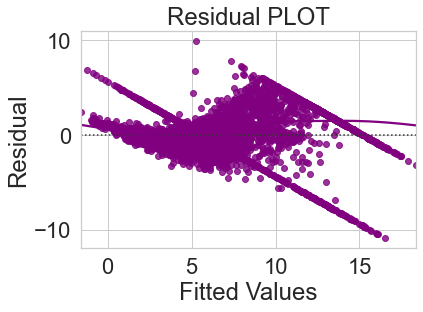

In [84]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

## Observation
There is a no pattern in this plot, its consided as a signs of linearity in the data and a pattern means that the model capture non-linear effects.

## TEST FOR NORMALITY

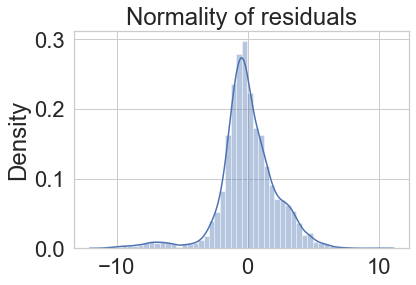

In [85]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

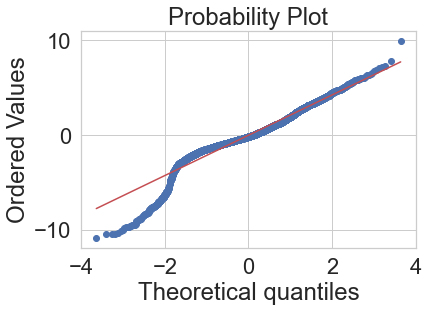

In [86]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

## Observation
1. The histogram gives a normal distribution 
2. Using QQ plot the normal probability plot of residuals should approximately follow a straight line.


## TEST FOR HOMOSCEDASTICITY

Null hypothesis : Residuals are homoscedasticity
    
Alternate hypothesis : Residuals have hetroscedasticity

In [87]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train7)
lzip(name, test)

[('F statistic', 1.068348674021796), ('p-value', 0.04944870171222671)]

### Since p-value = 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### Checking all the assumptions if they are satisfied, so we can move towards prediction part

## Predicting on the test data

In [88]:
X_train7.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Brand_Name_Audi',
       'Brand_Name_BMW', 'Brand_Name_Bentley', 'Brand_Name_Chevrolet',
       'Brand_Name_Datsun', 'Brand_Name_Fiat', 'Brand_Name_Force',
       'Brand_Name_Ford', 'Brand_Name_Hindustan', 'Brand_Name_Honda',
       'Brand_Name_Hyundai', 'Brand_Name_ISUZU', 'Brand_Name_Isuzu',
       'Brand_Name_Jaguar', 'Brand_Name_Jeep', 'Brand_Name_Lamborghini',
       'Brand_Name_Land', 'Brand_Name_Mahindra', 'Brand_Name_Mercedes-Benz',
       'Brand_Name_Mini', 'Brand_Name_Mitsubishi', 'Brand_Name_Nissan',
       'Brand_Name_OpelCorsa', 'Brand_Name_Porsche', 'Brand_Name_Renault',
 

In [89]:
X_test_final = X_test[X_train7.columns]

In [90]:
X_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Engine,Power,Fuel_Type_Diesel,Fuel_Type_Electric,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Location_Bangalore,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Hindustan,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_ISUZU,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo
2954,1.0,2016.0,30000,20.4,1197.0,81.80,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6520,1.0,2016.0,105000,23.2,1248.0,73.94,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6036,1.0,2009.0,131500,13.8,1399.0,68.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6251,1.0,2014.0,33750,15.6,1196.0,70.02,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6735,1.0,2017.0,35000,24.3,1248.0,88.50,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
X_train_final = X_train7[X_train7.columns]

## Checking the performance on train and test: metric used - RMSE

In [92]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)                              

Intercept of the linear equation: [-856.02560509]

Coefficients of the equation are: [[-1.32854304e-12  4.27509262e-01 -6.78005867e-06 -1.00708025e-01
   6.85943478e-04  2.65499941e-02  1.16483803e+00  7.64552359e+00
  -6.79128947e-01  7.08662549e-01 -1.10750332e-01 -5.61382553e-01
   2.22611621e-01  3.28674207e-01 -5.21269227e-01  3.17909728e-01
  -9.18923017e-02 -1.33339875e-01 -8.79034604e-01 -5.82160191e-02
   2.68140627e+00  2.24708606e+00  6.30323040e+00 -9.95680139e-01
  -1.31399939e+00 -9.18920924e-01  1.81319261e+00 -4.58339743e-01
   0.00000000e+00 -4.18934237e-01 -1.74055300e-01 -3.32694686e+00
  -8.93539453e-01  2.08948345e+00  2.50854363e+00  5.06331550e+00
   3.51092166e+00 -5.02054164e-01  2.14555051e+00  5.18596230e+00
   4.20346906e-01 -6.20109621e-01  3.46138540e+00  3.13963874e+00
  -5.66678740e-01 -8.88178420e-16 -1.69318347e+00  1.47626075e+00
  -6.49241650e-01  1.95310028e+00]]


In [97]:
y_pred = olsres6.predict(X_test_final)

In [98]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 2.2005077112367704
Test error: 2.181812453686058


### The model show a low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
### Hence we can conclude the model "olsres6" is good for prediction as well as inference purpose



In [95]:
print(X_train.shape)
print(X_train2.shape)

(5077, 55)
(5077, 55)


In [96]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     280.2
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        06:34:27   Log-Likelihood:                -11208.
No. Observations:                5077   AIC:                         2.251e+04
Df Residuals:                    5029   BIC:                         2.283e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Both  𝑅2 and RMSE shows that model fitted is good, has no overfitting and can be used for making predictions

### We can observe here, the results from 'olsreg6' and 'linearegession' model are the same.

# Observation
- R-squared is 0.724 making the model a good fit as it is close to 1. Indicating that if this model is tested 10times, 7times out of the 10 the model will predict good predictive values.
- 80% of the variables are below 0.05% significance level which shows that these variable are significant to the dependent variable Price of used cars.
- Negative values of coefficient shows that, Used car prices deceases with their increase for example Mileage has a negative coeffient of -0.1007. When a car mileage increases the price of used cars decreases and so those the other negative coeffienct factors impact the price of Used cars.
- Positive values of coefficient shows that, Used car prices increases with their increase, Power has a positive coefficient of 0.0267. A as the Power of the car Increases so those the price of Price of Used Cars so those the other negative coeffienct factors impact the price of Used cars.
- Price of New cars, Brand_Model and Seats have no significance to the model as it reduced the R-Square below 0.724.


## Recommendation
- 0.724 is a good model which can be used for future price prediction for used cars
- More Customer Demoghaphics information will be requried to build a better model for instance undertanding the income level of customers who but used cars and New cars. Information like this can help narrow Cars4u customer demoghaphics
- Car4u should gather more data on New cars as it help the model further understand the market trend.
- Mumbai & Hyderabad sold the highest unber of used cars, it will be a good location target market.
- More of Automatic cars should be focused on as it has sold more over the year.
